In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
study = pd.read_csv('stud_math.xls')

In [3]:
display(study.head(10))
study.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из таблицы видно, что в столбце "score" есть пустые значения. Проверим это:

In [4]:
print(study.score.unique())

[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]


In [5]:
study.score.isna().value_counts()

False    389
True       6
Name: score, dtype: int64

Так как нам нужно оценить какие факторы влияют на величину значений в столбце "score" и пустых значений там мало - всего 6, удалим из анализа эти 6 строк.

In [6]:
study1 = study.dropna(subset=['score'], axis=0)
study1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [7]:
print(study1['studytime, granular'].unique())
study1['studytime, granular'].value_counts()

[ -6.  -9.  -3.  nan -12.]


-6.0     189
-3.0     103
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

In [8]:
print(study1.studytime.unique())
study1.studytime.value_counts()

[ 2.  3.  1. nan  4.]


2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

Столбец 'studytime, granular'равен столбец 'studytime'  умноженный на -3. Для аналица оба столбца нам не нужны, уберем один из них.

In [9]:
study2 = study1.drop(['studytime, granular'], axis=1)
study2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [10]:
study1.isna().sum()

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

Чтобы продолжить анализ, нужно убрать нулевые значения. Проверим каждый столбец на нулевые значения и выберем способ их замены. В первых трех столбцах нулевых значений нет. Начнем со столбца "address".

In [11]:
print(study2.address.unique())
print(study2.address.value_counts())

count = 0
for x in study2['address']:
    if x != 'U' and x != 'R':
        count += 1
print(count)        

['U' nan 'R']
U    291
R     83
Name: address, dtype: int64
15


Здесь 15 нулевых значенй. Удалять их нерационально. Заменять только одним значением, считаю нерационально. Применим метод "ffill", чтобы значения распределились случайно (предположительно, значений "U" должно получиться больше, так как встречаются они чаще).

In [12]:
study2['address'] = study2['address'].fillna(value=None,method="ffill")

In [13]:
print(study2.address.value_counts())

U    300
R     89
Name: address, dtype: int64


Из 15 значений 9 стали 'U' и 6 - 'R'. То, что нужно.

In [14]:
print(study2.famsize.unique())
print(study2.famsize.value_counts())

count = 0
for x in study2['famsize']:
    if x != 'GT3' and x != 'LE3':
        count += 1
print(count)   

[nan 'GT3' 'LE3']
GT3    255
LE3    107
Name: famsize, dtype: int64
27


В столбце famsize 27 пустых значений. Так как у нас есть пустое значение в первой строчке, используем другой метод.

In [15]:
study2['famsize'] = study2['famsize'].fillna(value=None,method="bfill")

In [16]:
print(study2.famsize.value_counts())

GT3    275
LE3    114
Name: famsize, dtype: int64


In [17]:
print(study2.Pstatus.unique())
print(study2.Pstatus.value_counts())

count = 0
for x in study2['Pstatus']:
    if x != 'T' and x != 'A':
        count += 1
print(count) 

['A' nan 'T']
T    308
A     36
Name: Pstatus, dtype: int64
45


В столбце Pstatus 45 пустых значений. Заменяем.

In [18]:
study2['Pstatus'] = study2['Pstatus'].fillna(value=None,method="ffill")

In [19]:
print(study2.Pstatus.value_counts())

T    347
A     42
Name: Pstatus, dtype: int64


In [20]:
print(study2.Medu.unique())
print(study2.Medu.value_counts())

count = 0
for x in study2['Medu']:
    if x not in [0.0,1.0,2.0,3.0,4.0]:
        count += 1
print(count)   

[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64
3


В этом столбике всего 3 пустых значения. Давайте вставим вместо них самое часто встречающееся значение.

In [21]:
study2.Medu = study2.Medu.apply(lambda x: 4.0 if pd.isna(x) == True else x)

In [22]:
print(study2.Medu.value_counts())

4.0    134
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64


In [23]:
print(study2.Fedu.unique())
print(study2.Fedu.value_counts())

count = 0
for x in study2['Fedu']:
    if x not in [0.0,1.0,2.0,3.0,4.0]:
        count += 1
print(count)

[ 4.  1.  2.  3. 40. nan  0.]
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64
25


In [24]:
study2['Fedu'] = study2['Fedu'].fillna(value=None,method="ffill")

In [25]:
print(study2.Fedu.value_counts())

2.0     111
3.0     103
4.0      92
1.0      80
0.0       2
40.0      1
Name: Fedu, dtype: int64


Одно значение выбивается из списка и равно 40.0. Очевидно, это ошибка ввода, заменим его на 4.0

In [26]:
study2.Fedu = study2.Fedu.replace(to_replace = 40.0, value =4.0)

In [27]:
print(study2.Fedu.value_counts())

2.0    111
3.0    103
4.0     93
1.0     80
0.0      2
Name: Fedu, dtype: int64


В тех столбцах, в которых присутствует ответ "Другое", заменим пустые строчки этим ответом

In [28]:
print(study2.Mjob.unique())
print(study2.Mjob.value_counts())

count = 0
for x in study2['Mjob']:
    if x not in ['teacher','health','services','at_home','other']:
        count += 1
print(count)

['at_home' 'health' 'other' 'services' 'teacher' nan]
other       127
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
19


In [29]:
study2.Mjob = study2.Mjob.apply(lambda x: 'other' if pd.isna(x) == True else x)

In [30]:
print(study2.Mjob.value_counts())

other       146
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


In [31]:
print(study2.Fjob.unique())
print(study2.Fjob.value_counts())

count = 0
for x in study2['Fjob']:
    if x not in ['teacher','health','services','at_home','other']:
        count += 1
print(count)

['teacher' 'other' nan 'health' 'services' 'at_home']
other       194
services     99
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
36


In [32]:
study2.Fjob = study2.Fjob.apply(lambda x: 'other' if pd.isna(x) == True else x)

In [33]:
print(study2.Fjob.value_counts())

other       230
services     99
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


In [34]:
print(study2.reason.unique())
print(study2.reason.value_counts())

count = 0
for x in study2['reason']:
    if x not in ['home','reputation','course','other']:
        count += 1
print(count)

['course' 'other' 'home' 'reputation' nan]
course        135
reputation    102
home          101
other          34
Name: reason, dtype: int64
17


In [35]:
study2.reason = study2.reason.apply(lambda x: 'other' if pd.isna(x) == True else x)

In [36]:
print(study2.reason.value_counts())

course        135
reputation    102
home          101
other          51
Name: reason, dtype: int64


В этом столбце нельзя обозначить нулевые значения как "другое", так как это означает что опекуном является кто-то из родственников, а такие случаи не часты. Нулевых же значений больше, чем ответов "другое" и намеренное завышение показателя испортит статистику. Поэтому выделим нулевые значения в отдельную категорию "нет ответа". (Если бы их было меньше, можно было бы распределить их между 'mother'и 'father' или прибавить только к 'mother').

In [37]:
print(study2.guardian.unique())
print(study2.guardian.value_counts())

count = 0
for x in study2['guardian']:
    if x not in ['mother','father','other']:
        count += 1
print(count)

['mother' 'father' 'other' nan]
mother    248
father     86
other      24
Name: guardian, dtype: int64
31


In [38]:
study2.guardian = study2.guardian.apply(lambda x: 'no_answer' if pd.isna(x) == True else x)

In [39]:
print(study2.guardian.value_counts())

mother       248
father        86
no_answer     31
other         24
Name: guardian, dtype: int64


В столбцах, значения которых варьируются от 1 до 5 распределим нулевые значения методом "ffill".

In [40]:
print(study2.traveltime.unique())
print(study2.traveltime.value_counts())

count = 0
for x in study2['traveltime']:
    if x not in [1,2,3,4]:
        count += 1
print(count)

[ 2.  1.  3. nan  4.]
1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64
28


In [41]:
study2['traveltime'] = study2['traveltime'].fillna(value=None,method="ffill")

In [42]:
print(study2.traveltime.value_counts())

1.0    257
2.0    101
3.0     24
4.0      7
Name: traveltime, dtype: int64


In [43]:
print(study2.studytime.unique())
print(study2.studytime.value_counts())

count = 0
for x in study2['studytime']:
    if x not in [1,2,3,4]:
        count += 1
print(count)

[ 2.  3.  1. nan  4.]
2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64
7


In [44]:
study2.studytime = study2.studytime.apply(lambda x: 2.0 if pd.isna(x) == True else x)

In [45]:
print(study2.studytime.value_counts())

2.0    196
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64


In [46]:
print(study2.failures.unique())
print(study2.failures.value_counts())

count = 0
for x in study2['failures']:
    if x not in [0,1,2,3]:
        count += 1
print(count)

[ 0.  3. nan  2.  1.]
0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64
22


In [47]:
study2.failures = study2.failures.apply(lambda x: 0.0 if pd.isna(x) == True else x)

In [48]:
print(study2.failures.value_counts())

0.0    312
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64


Дальше идет несколько столбцов, значения в которых равны 'yes' или 'no'. Так же заменим нулевые значения методом "ffill", чтобы значения распределились равномерно. В столбце 'activities' значений примерно поровну, можно бы было так же распределить и 14 нулевых значений - по 7 в каждый ответ. Но метод "ffill" распределил значения 8/6, это нас тоже устраивает. 

In [49]:
print(study2.schoolsup.unique())
print(study2.schoolsup.value_counts())

count = 0
for x in study2['schoolsup']:
    if x not in ['yes','no']:
        count += 1
print(count)

['yes' 'no' nan]
no     331
yes     49
Name: schoolsup, dtype: int64
9


In [50]:
study2['schoolsup'] = study2['schoolsup'].fillna(value=None,method="ffill")

In [51]:
print(study2.schoolsup.value_counts())

no     339
yes     50
Name: schoolsup, dtype: int64


In [52]:
print(study2.famsup.unique())
print(study2.famsup.value_counts())

count = 0
for x in study2['famsup']:
    if x not in ['yes','no']:
        count += 1
print(count)

['no' 'yes' nan]
yes    216
no     135
Name: famsup, dtype: int64
38


In [53]:
study2['famsup'] = study2['famsup'].fillna(value=None,method="ffill")

In [54]:
print(study2.famsup.value_counts())

yes    238
no     151
Name: famsup, dtype: int64


In [55]:
print(study2.paid.unique())
print(study2.paid.value_counts())

count = 0
for x in study2['paid']:
    if x not in ['yes','no']:
        count += 1
print(count)

['no' nan 'yes']
no     197
yes    153
Name: paid, dtype: int64
39


In [56]:
study2['paid'] = study2['paid'].fillna(value=None,method="ffill")

In [57]:
print(study2.paid.value_counts())

no     220
yes    169
Name: paid, dtype: int64


In [58]:
print(study2.activities.unique())
print(study2.activities.value_counts())

count = 0
for x in study2['activities']:
    if x not in ['yes','no']:
        count += 1
print(count)

['no' 'yes' nan]
yes    192
no     183
Name: activities, dtype: int64
14


In [59]:
study2['activities'] = study2['activities'].fillna(value=None,method="ffill")

In [60]:
print(study2.activities.value_counts())

yes    200
no     189
Name: activities, dtype: int64


In [61]:
print(study2.nursery.unique())
print(study2.nursery.value_counts())

count = 0
for x in study2['nursery']:
    if x not in ['yes','no']:
        count += 1
print(count)

['yes' 'no' nan]
yes    297
no      77
Name: nursery, dtype: int64
15


In [62]:
study2['nursery'] = study2['nursery'].fillna(value=None,method="ffill")

In [63]:
print(study2.nursery.value_counts())

yes    309
no      80
Name: nursery, dtype: int64


In [64]:
print(study2.higher.unique())
print(study2.higher.value_counts())

count = 0
for x in study2['higher']:
    if x not in ['yes','no']:
        count += 1
print(count)

['yes' nan 'no']
yes    350
no      19
Name: higher, dtype: int64
20


In [65]:
study2['higher'] = study2['higher'].fillna(value=None,method="ffill")

In [66]:
print(study2.higher.value_counts())

yes    368
no      21
Name: higher, dtype: int64


In [67]:
print(study2.internet.unique())
print(study2.internet.value_counts())

count = 0
for x in study2['internet']:
    if x not in ['yes','no']:
        count += 1
print(count)

[nan 'yes' 'no']
yes    300
no      55
Name: internet, dtype: int64
34


In [68]:
study2['internet'] = study2['internet'].fillna(value=None,method="bfill")

In [69]:
print(study2.internet.value_counts())

yes    328
no      61
Name: internet, dtype: int64


In [70]:
print(study2.romantic.unique())
print(study2.romantic.value_counts())

count = 0
for x in study2['romantic']:
    if x not in ['yes','no']:
        count += 1
print(count)

['no' nan 'yes']
no     235
yes    123
Name: romantic, dtype: int64
31


In [71]:
study2['romantic'] = study2['romantic'].fillna(value=None,method="ffill")

In [72]:
print(study2.romantic.value_counts())

no     255
yes    134
Name: romantic, dtype: int64


In [73]:
print(study2.famrel.unique())
print(study2.famrel.value_counts())

count = 0
for x in study2['famrel']:
    if x not in [1.0,2.0,3.0,4.0,5.0]:
        count += 1
print(count)

[ 4.  5.  3. nan -1.  2.  1.]
 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
28


Одно значение выбивается из списка и равно -1.0. Очевидно, это ошибка ввода, заменим его на 1.0

In [74]:
study2.famrel = study2.famrel.replace(to_replace = -1.0, value =1.0)

In [75]:
study2['famrel'] = study2['famrel'].fillna(value=None,method="ffill")

In [76]:
print(study2.famrel.value_counts())

4.0    188
5.0    108
3.0     68
2.0     17
1.0      8
Name: famrel, dtype: int64


In [77]:
print(study2.freetime.unique())
print(study2.freetime.value_counts())

count = 0
for x in study2['freetime']:
    if x not in [1.0,2.0,3.0,4.0,5.0]:
        count += 1
print(count)

[ 3.  2.  4.  1.  5. nan]
3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64
9


In [78]:
study2['freetime'] = study2['freetime'].fillna(value=None,method="ffill")

In [79]:
print(study2.freetime.value_counts())

3.0    155
4.0    112
2.0     67
5.0     37
1.0     18
Name: freetime, dtype: int64


In [80]:
print(study2.goout.unique())
print(study2.goout.value_counts())

count = 0
for x in study2['goout']:
    if x not in [1.0,2.0,3.0,4.0,5.0]:
        count += 1
print(count)

[ 4.  3.  2.  1.  5. nan]
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64
7


In [81]:
study2['goout'] = study2['goout'].fillna(value=None,method="ffill")

In [82]:
print(study2.goout.value_counts())

3.0    126
2.0    105
4.0     81
5.0     54
1.0     23
Name: goout, dtype: int64


In [83]:
print(study2.health.unique())
print(study2.health.value_counts())

count = 0
for x in study2['health']:
    if x not in [1.0,2.0,3.0,4.0,5.0]:
        count += 1
print(count)

[ 3.  5.  1.  2.  4. nan]
5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64
15


In [84]:
study2['health'] = study2['health'].fillna(value=None,method="ffill")

In [85]:
print(study2.health.value_counts())

5.0    140
3.0     90
4.0     63
1.0     51
2.0     45
Name: health, dtype: int64


В столбце "absences" заменим пустые значения медианой. 

In [86]:
print(study2.absences.unique())
print(study2.absences.value_counts())

[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


In [87]:
study2['absences'] = study2['absences'].fillna(study2['absences'].median())

In [88]:
print(study2.absences.value_counts())

0.0      110
4.0       63
2.0       60
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


Проверяем, что больше нет пропусков:

In [89]:
study2.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

Теперь проверим числовые столбцы на наличие выбросов. На предыдущем шаге видно, что в столбцах, где нужно указать значение признака от 0 до 5 все заполнено верно. Даже если какое-то значение встречается очень малое количество раз - это не выброс. Поэтому, теоретически, выбросы могут быть только в столбцах "age" и "absences".

In [90]:
print(study2.age.unique())
study2.age.value_counts()

[18 17 15 16 19 22 20 21]


16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

В задании сказано: Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет. Все данные попадают в этот промежуток. Данные об ученике, которому 22 года можно посчитать выбросом, но я оставлю их в анализе, так как это не противоречит цели исследования.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


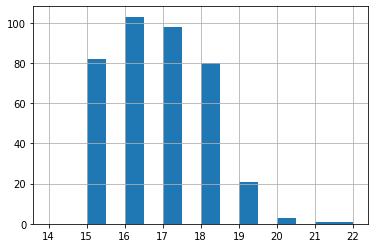

In [91]:
IQR = study2.age.quantile(0.75) - study2.age.quantile(0.25)
perc25 = study2.age.quantile(0.25)
perc75 = study2.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study2.age.hist(bins = 16, range = (14, 22), label = 'IQR')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


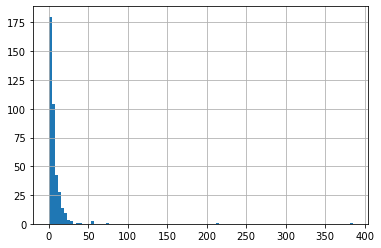

In [92]:
IQR = study2.absences.quantile(0.75) - study2.absences.quantile(0.25)
perc25 = study2.absences.quantile(0.25)
perc75 = study2.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study2.absences.hist(bins = 100)

Мне кажется, для анализа было бы интересно посмотрть далее, как зависит балл итогового теста от колличества пропущенных занятий. Поэтому, уберем из анализа только два самых выбивающихся значения (385 и 212).

In [93]:
study3 = study2.loc[study2['absences'] != 385]             


In [94]:
study3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      388 non-null    object 
 1   sex         388 non-null    object 
 2   age         388 non-null    int64  
 3   address     388 non-null    object 
 4   famsize     388 non-null    object 
 5   Pstatus     388 non-null    object 
 6   Medu        388 non-null    float64
 7   Fedu        388 non-null    float64
 8   Mjob        388 non-null    object 
 9   Fjob        388 non-null    object 
 10  reason      388 non-null    object 
 11  guardian    388 non-null    object 
 12  traveltime  388 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    388 non-null    float64
 15  schoolsup   388 non-null    object 
 16  famsup      388 non-null    object 
 17  paid        388 non-null    object 
 18  activities  388 non-null    object 
 19  nursery     388 non-null    o

In [95]:
study4= study3.loc[study3['absences'] != 212]
study4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      387 non-null    object 
 1   sex         387 non-null    object 
 2   age         387 non-null    int64  
 3   address     387 non-null    object 
 4   famsize     387 non-null    object 
 5   Pstatus     387 non-null    object 
 6   Medu        387 non-null    float64
 7   Fedu        387 non-null    float64
 8   Mjob        387 non-null    object 
 9   Fjob        387 non-null    object 
 10  reason      387 non-null    object 
 11  guardian    387 non-null    object 
 12  traveltime  387 non-null    float64
 13  studytime   387 non-null    float64
 14  failures    387 non-null    float64
 15  schoolsup   387 non-null    object 
 16  famsup      387 non-null    object 
 17  paid        387 non-null    object 
 18  activities  387 non-null    object 
 19  nursery     387 non-null    o

In [96]:
study4.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.143429,-0.157639,0.079312,-0.017954,0.192816,0.060532,-0.002082,0.113979,-0.074283,0.169789,-0.153488
Medu,-0.143429,1.000000,0.602576,-0.148840,0.075977,-0.236824,0.003336,0.056783,0.070727,-0.028665,0.093706,0.203759
Fedu,-0.157639,0.602576,1.000000,-0.115820,-0.006750,-0.256619,0.013212,-0.004096,0.035019,0.066164,0.041345,0.126276
traveltime,0.079312,-0.148840,-0.115820,1.000000,-0.093944,0.043061,-0.018901,-0.017309,0.046254,-0.028166,-0.002124,-0.060923
studytime,-0.017954,0.075977,-0.006750,-0.093944,1.000000,-0.170471,0.050173,-0.111741,-0.050547,-0.056674,-0.064100,0.114737
failures,0.192816,-0.236824,-0.256619,0.043061,-0.170471,1.000000,-0.048162,0.071271,0.098144,0.068549,0.061911,-0.337138
famrel,0.060532,0.003336,0.013212,-0.018901,0.050173,-0.048162,1.000000,0.156385,0.055971,0.091018,-0.042048,0.065239
freetime,-0.002082,0.056783,-0.004096,-0.017309,-0.111741,0.071271,0.156385,1.000000,0.286850,0.055849,-0.082680,0.027086
goout,0.113979,0.070727,0.035019,0.046254,-0.050547,0.098144,0.055971,0.286850,1.000000,-0.017397,0.027043,-0.133697
health,-0.074283,-0.028665,0.066164,-0.028166,-0.056674,0.068549,0.091018,0.055849,-0.017397,1.000000,-0.025465,-0.064587


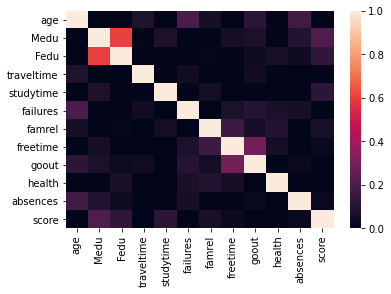

In [97]:
sns.heatmap(study4.corr(),vmin=0, vmax=1)

Наиболее сильно коррелируют между собой образование отца и матери, что естстественно, для людей, образующих семью. Но влиять на оценки детей могут по-разному, оставим оба столбика. Так же коррелируют количество свободного времени и время, проводимое с друзьями. Оставим один столбец со свободным временем.

Есть обратная корреляция между оценками и количеством внеучебных неудач - чем успешнее ученик, тем выше оценки.

In [98]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study4.loc[study4.loc[:, column].isin(study4.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

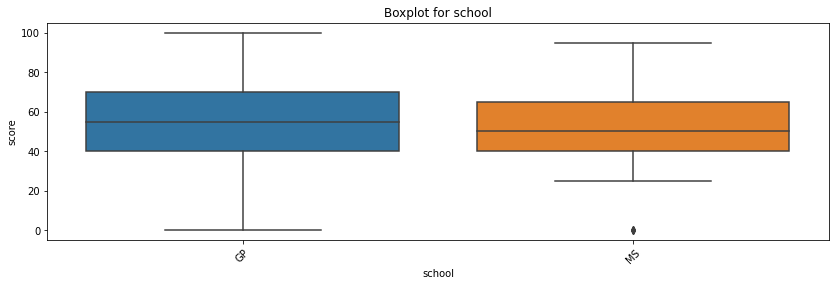

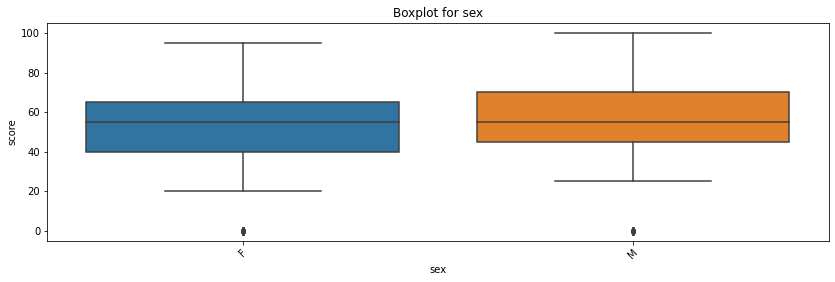

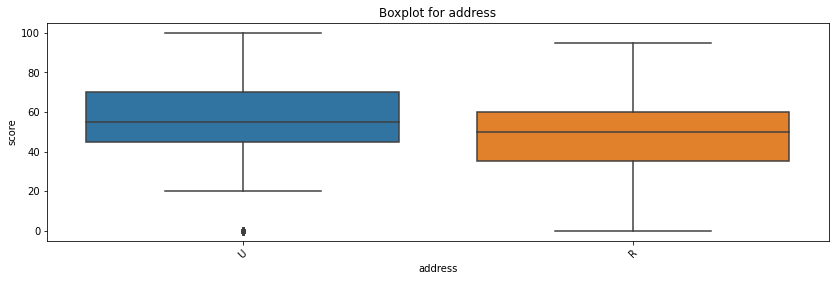

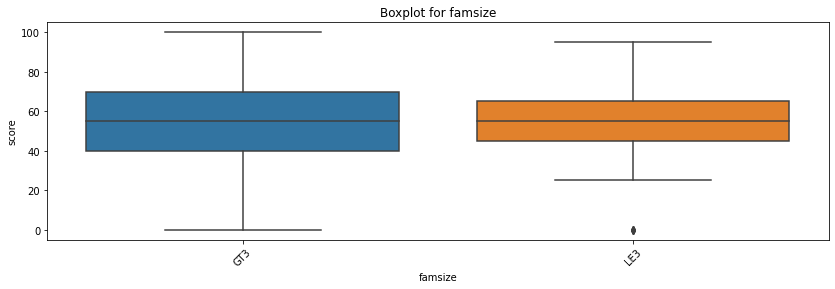

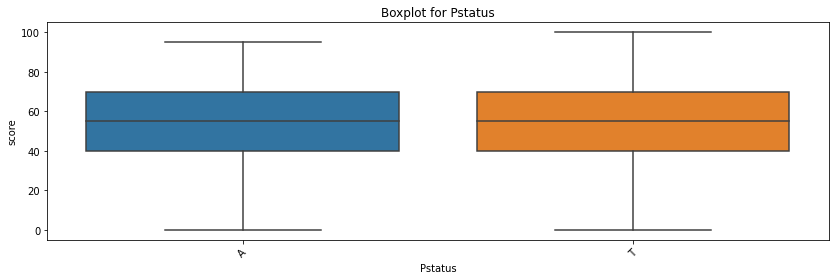

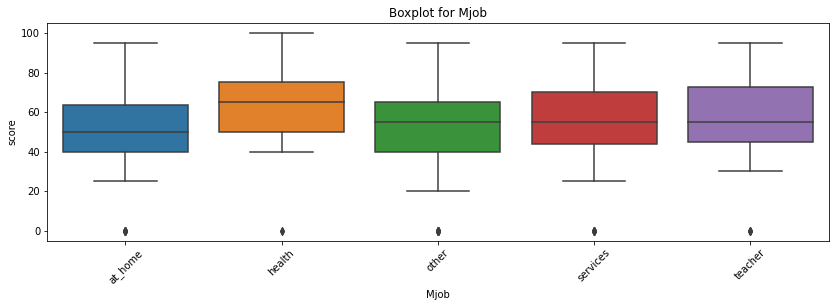

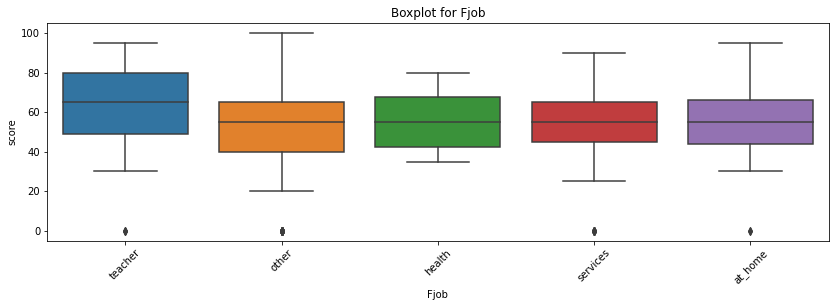

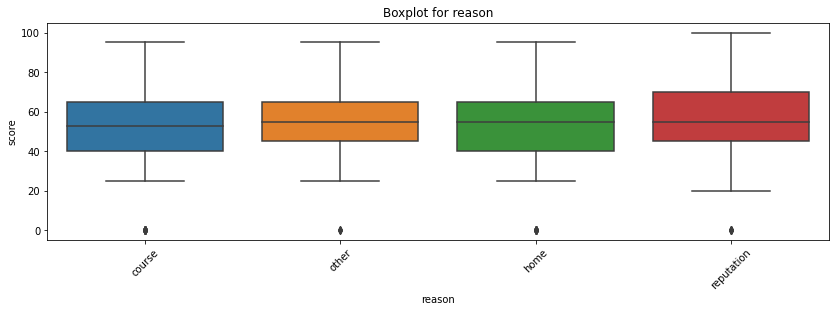

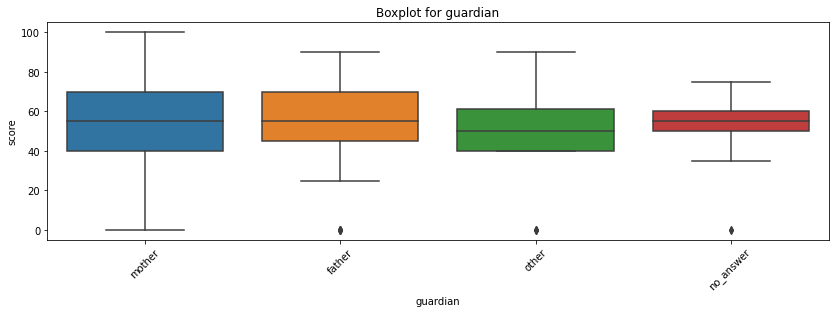

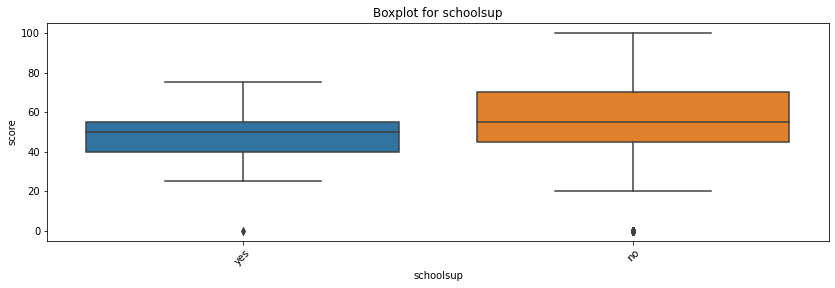

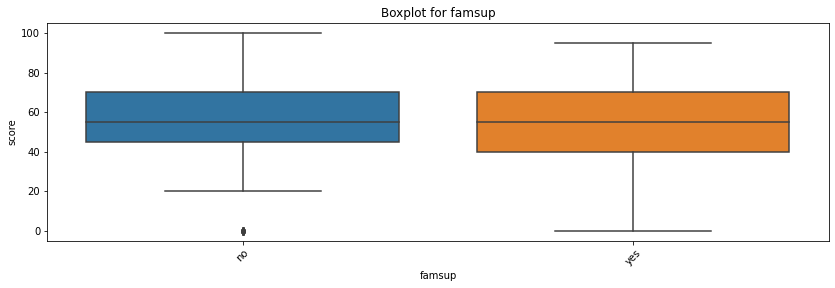

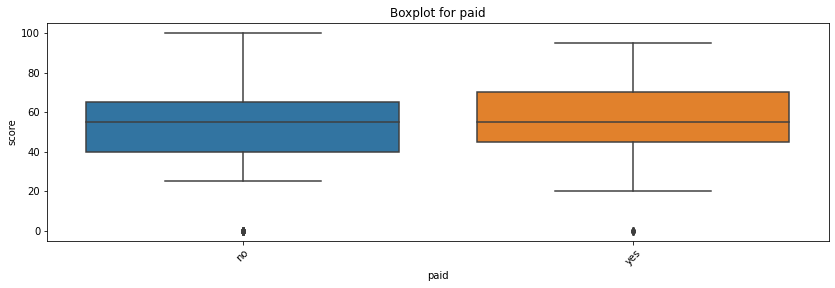

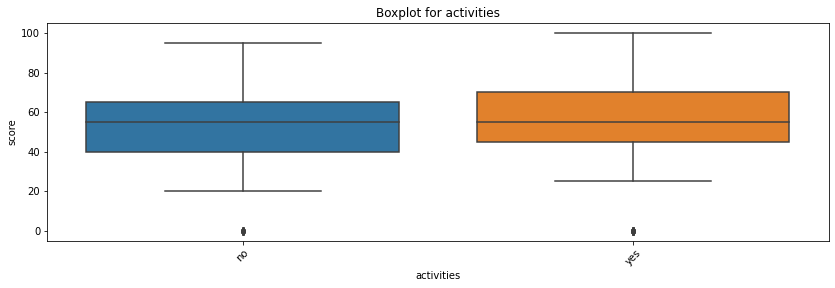

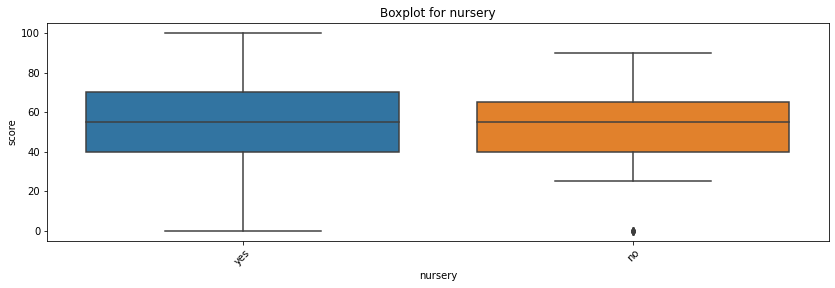

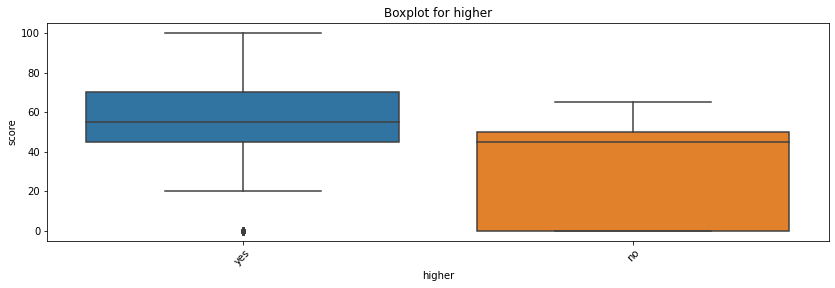

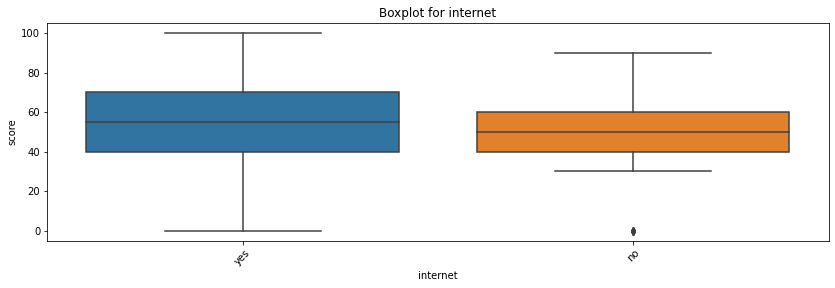

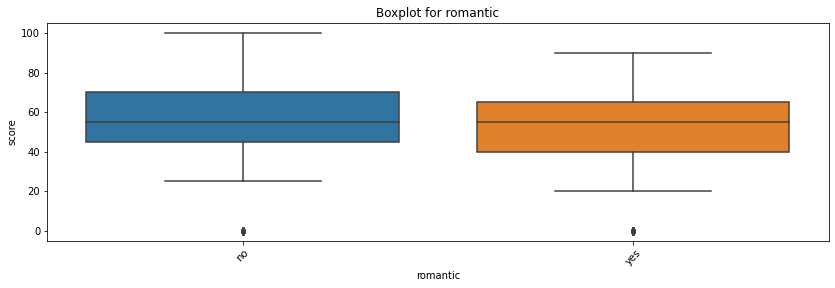

In [99]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]:
    get_boxplot(col)

Сравнивая боксплоты, можно сказать, что значимыми признаками для "score" являются столбцы: 'school', 'sex', 'address', 'Mjob',  'schoolsup', 'paid', 'activities', 'higher', 'internet', 'romantic'. 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [100]:
def get_stat_dif(column):
    cols = study4.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study4.loc[study4.loc[:, column] == comb[0], 'score'], 
                        study4.loc[study4.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [101]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Эти шесть столбцов однозначно оставляем для анализа.  Столбец 'activities' - как ни странно,оценки выше  у тех, кто посещает дополнительные внеучебные занятия, хотя на учебу остается меньше времени. Я бы оставила этот критерий для более детального анализа. Столбец 'address' тоже достаточно предсказуем, оценки выше у тех, кто живет в городе. В номинативных переменных есть столбец с затратами на дорогу, оставим его, а 'address' удалим. 

In [102]:
study5 = study4.drop(['goout','internet', 'school','famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'famsup', 'nursery','address'], axis=1)

In [103]:
display(study5.head(10))

,sex,age,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,health,absences,score
0,F,18,4.0,4.0,at_home,2.0,2.0,0.0,yes,no,no,yes,no,4.0,3.0,3.0,6.0,30.0
1,F,17,1.0,1.0,at_home,1.0,2.0,0.0,no,no,no,yes,no,5.0,3.0,3.0,4.0,30.0
2,F,15,1.0,1.0,at_home,1.0,2.0,3.0,yes,no,no,yes,no,4.0,3.0,3.0,10.0,50.0
3,F,15,4.0,2.0,health,1.0,3.0,0.0,no,yes,yes,yes,yes,3.0,2.0,5.0,2.0,75.0
4,F,16,3.0,3.0,other,1.0,2.0,0.0,no,yes,no,yes,no,4.0,3.0,5.0,4.0,50.0
5,M,16,4.0,3.0,services,1.0,2.0,0.0,no,yes,yes,yes,no,5.0,4.0,5.0,10.0,75.0
6,M,16,2.0,2.0,other,1.0,2.0,0.0,no,no,no,yes,no,4.0,4.0,3.0,0.0,55.0
7,F,17,4.0,4.0,other,2.0,2.0,0.0,yes,no,no,yes,no,4.0,1.0,1.0,6.0,30.0
8,M,15,3.0,2.0,services,1.0,2.0,0.0,no,yes,no,yes,no,4.0,2.0,1.0,0.0,95.0
9,M,15,3.0,4.0,other,1.0,2.0,0.0,no,yes,yes,yes,no,5.0,5.0,5.0,0.0,75.0


Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели - эти 18 столбцов. Все пустые значения заполнены корректно. Выбросов в данных практически не было, данные чистые. 